# Combinatorial Optimization Benchmark Datasets

Examples of benchmark datasets for combinatorial optimization problems:

| Benchmark Dataset     | Description | Sources |
| --- | --- | --- |
| Traveling Salesman Problem (TSP) | Given a set of n nodes and distances for each pair of nodes, find a roundtrip of minimal total length visiting each node exactly once. The distance from node i to node j is the same as from node j to node i. | <a href="https://github.com/coin-or/jorlib/tree/master/jorlib-core/src/test/resources/tspLib/tsp">tspLib/tsp</a> |
|Vehicle Routing Problem (VRP) | Determining the optimal routes and schedules for a fleet of vehicles to serve a set of customers or locations. | <a href="https://github.com/coin-or/jorlib/tree/master/jorlib-core/src/test/resources/tspLib/vrp">tspLib/vrp</a> and <a href="http://neumann.hec.ca/chairedistributique/data">Neumann</a>|
| Job shop scheduling (JSS) | JSS involves scheduling a set of jobs on a set of machines, where each job consists of multiple operations that must be processed on different machines in a specific order. The objective is to determine an optimal schedule that minimizes the makespan or total completion time of all jobs. | <a href="http://people.brunel.ac.uk/~mastjjb/jeb/orlib/files/jobshop1.txt">jobshop1/vrp</a> and <a href="http://people.brunel.ac.uk/~mastjjb/jeb/orlib/files/jobshop2.txt">jobshop2</a>|
| Assembly Line Balancing Problem (ALBP) | ALBP addresses assigning tasks (work elements) to workstations that minimizes the amount of the idle time of the line, while satisfying specific constraints. ALBP generally comprises all tasks and decisions which are related to equipping and aligning the productive units for a given production process, before the actual assembly process can start. This encompasses setting the system capacity, which includes cycle time, number of stations, and station equipment, as well as assigning work content to productive units, which includes task assignment and determining the sequence of operations. | https://assembly-line-balancing.de/ |
|Quadratic Assignment Problem (QAP) | QAP addresses determining the optimal assignment of a set of facilities to a set of locations. It is widely studied in operations research and has applications in various fields such as facility layout design, manufacturing, logistics, and telecommunications. | http://mistic.heig-vd.ch/taillard/problemes.dir/qap.dir/qap.html | 
|TBD...|TBD...|TBD...|
|TBD...|TBD...|TBD...|
|TBD...|TBD...|TBD...|



## Traveling Salesman Problem (TSP)

Several instances of TSP are available here: https://github.com/coin-or/jorlib/tree/master/jorlib-core/src/test/resources/tspLib/tsp 

In [1]:
# !pip install tsplib95

Header Information:
NAME: berlin52
TYPE: TSP
COMMENT: 52 locations in Berlin (Groetschel)
DIMENSION: 52
EDGE_WEIGHT_TYPE: EUC_2D



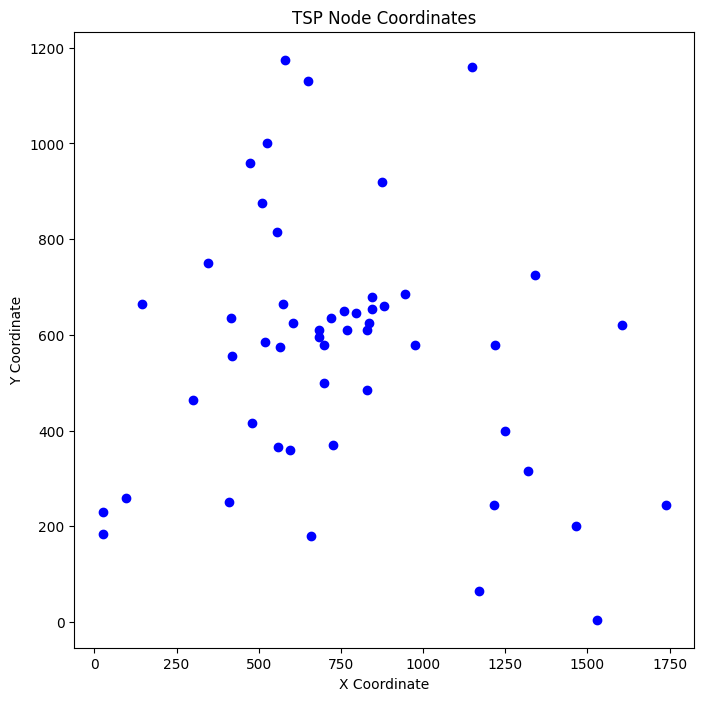

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# URL of the TSP benchmark dataset file
url = 'https://raw.githubusercontent.com/coin-or/jorlib/master/jorlib-core/src/test/resources/tspLib/tsp/berlin52.tsp'

# Fetch the contents of the URL
response = requests.get(url)

# Extract the header information
header = ""
lines = response.text.strip().split('\n')
for line in lines:
    if line.startswith('NAME') or line.startswith('TYPE') or line.startswith('COMMENT') or line.startswith('DIMENSION') or line.startswith('EDGE_WEIGHT_TYPE'):
        header += line.strip() + '\n'

# Print the header information
print("Header Information:")
print(header)

# Parse the TSP dataset file into a DataFrame
df = pd.read_csv(url, skiprows=6, delim_whitespace=True, names=['node', 'x', 'y'])

# Extract node coordinates from the DataFrame
node_coords = df[['x', 'y']].to_numpy()

# Visualize the node coordinates
x_coords = node_coords[:, 0]
y_coords = node_coords[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_coords, y_coords, color='blue', marker='o')
plt.title('TSP Node Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# Vehicle Routing Problem (VRP)

Several instances of VRP are available here: https://github.com/coin-or/jorlib/tree/master/jorlib-core/src/test/resources/tspLib/vrp

Header Information:
NAME : eilA101
TYPE : CVRP
DIMENSION : 101
EDGE_WEIGHT_TYPE : EUC_2D



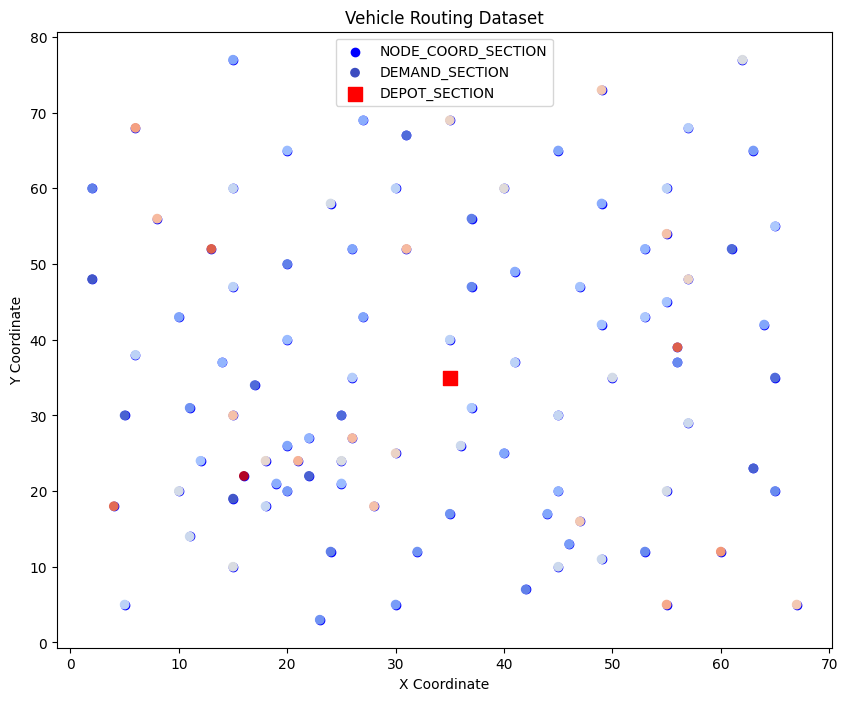

In [3]:
import requests
import matplotlib.pyplot as plt

# URL of the vehicle routing dataset file
url = 'https://raw.githubusercontent.com/coin-or/jorlib/master/jorlib-core/src/test/resources/tspLib/vrp/eilA101.vrp'

# Fetch the contents of the URL
response = requests.get(url)

# Extract the header information
header = ""
lines = response.text.strip().split('\n')
for line in lines:
    if line.startswith('NAME') or line.startswith('TYPE') or line.startswith('DIMENSION') or line.startswith('EDGE_WEIGHT_TYPE'):
        header += line.strip() + '\n'

# Print the header information
print("Header Information:")
print(header)

node_coords = []
demand_section = []
depot_section = []

section = None
for line in lines:
    if line.startswith('NODE_COORD_SECTION'):
        section = 'NODE_COORD_SECTION'
    elif line.startswith('DEMAND_SECTION'):
        section = 'DEMAND_SECTION'
    elif line.startswith('DEPOT_SECTION'):
        section = 'DEPOT_SECTION'
    elif line.startswith('EOF'):
        break
    elif section == 'NODE_COORD_SECTION':
        parts = line.split()
        x, y = map(float, parts[1:])
        node_coords.append((x, y))
    elif section == 'DEMAND_SECTION':
        demand = int(line.split()[1])
        demand_section.append(demand)
    elif section == 'DEPOT_SECTION':
        depot = int(line.split()[0])
        depot_section.append(depot)

# Visualize the sections
node_x = [coord[0] for coord in node_coords]
node_y = [coord[1] for coord in node_coords]

plt.figure(figsize=(10, 8))

# Visualize NODE_COORD_SECTION
plt.scatter(node_x, node_y, color='blue', label='NODE_COORD_SECTION')

# Visualize DEMAND_SECTION
plt.scatter(node_x, node_y, c=demand_section, cmap='coolwarm', label='DEMAND_SECTION')

# Visualize DEPOT_SECTION
plt.scatter(node_x[depot_section[0] - 1], node_y[depot_section[0] - 1], color='red', marker='s', s=100, label='DEPOT_SECTION')

plt.title('Vehicle Routing Dataset')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()


# Job shop scheduling (JSS)

Several instances of JSS are available here: http://people.brunel.ac.uk/~mastjjb/jeb/orlib/files/

In [4]:
import requests

# URL of the Job Shop Scheduling benchmark dataset file
url = 'http://people.brunel.ac.uk/~mastjjb/jeb/orlib/files/jobshop1.txt'

# Fetch the contents of the URL
response = requests.get(url)
lines = response.text.strip().split('\n')
# Find the start and end indices of the instance "abz5"
start_index = None
end_index = None
for i, line in enumerate(lines):
    if line.startswith('abz5'):
        start_index = i
    elif start_index is not None and line.strip() == '':
        end_index = i
        break

# Extract the instance "abz5" lines
instance_lines = lines[start_index:end_index]

# Print the instance "abz5"
print("Instance abz5:")
for line in instance_lines:
    print(line)


Instance abz5:
This file contains a set of 82 JSP test instances.

These instances are contributed to the OR-Library by
Dirk C. Mattfeld (email dirk@uni-bremen.de) and 
Rob J.M. Vaessens (email robv@win.tue.nl).
 
o abz5-abz9 are from
   J. Adams, E. Balas and D. Zawack (1988),
   The shifting bottleneck procedure for job shop scheduling,
   Management Science 34, 391-401.
o ft06, ft10, and ft20 are from 
   H. Fisher, G.L. Thompson (1963), 
   Probabilistic learning combinations of local job-shop scheduling rules, 
     J.F. Muth, G.L. Thompson (eds.), 
     Industrial Scheduling, 
     Prentice Hall, Englewood Cliffs, New Jersey, 
   225-251.
o la01-la40 are from 
   S. Lawrence (1984),
   Resource constrained project scheduling: an experimental investigation of 
     heuristic scheduling techniques (Supplement), 
   Graduate School of Industrial Administration,
   Carnegie-Mellon University, Pittsburgh, Pennsylvania.
o orb01-orb10 are from 
   D. Applegate, W. Cook (1991),
   A comp

# Assembly Line Balancing Problem

* Visit the website https://assembly-line-balancing.de/.
* Look for a section or page on the website that provides access to the datasets.
* Check if there are any specific instructions or guidelines for accessing or downloading the datasets. Follow those instructions if available.
* Look for a "Download" or "Data" section on the website, which may contain links or options to download the datasets.
* Click on the appropriate link or button to download the desired dataset.

Sample data is available in Appendix B of the book's GitHub repo and can be read directly using URL begins with raw.

Input files for all precedence graphs included in the data sets of:

Scholl, Armin (1993): Data of Assembly Line Balancing Problems. 
  Schriften zur Quantitativen Betriebswirtschaftslehre 16/93, Th Darmstadt.

Format of in2-files:

line 1: number n of tasks

lines 2-n+1: integer task times

lines n+2,...: direct precedence relations in form "i,j"

last line: end mark "-1,-1" (optional)

In [5]:
import requests

# URL of the Assembly Line Balancing Problem dataset file
url = 'https://raw.githubusercontent.com/Optimization-Algorithms-Book/Code-Listings/main/Appendix%20B/data/ALBP/SALBP-data-sets/precedence%20graphs/MANSOOR.IN2'

# Fetch the contents of the URL
response = requests.get(url)

# Print the data
print("Assembly Line Balancing Problem Dataset:")
print(response.text)


Assembly Line Balancing Problem Dataset:
4
38
45
12
10
8
12
10
2
10
34
1,4
2,4
2,5
3,11
4,6
5,7
6,8
7,9
8,10
9,10
10,11
-1,-1



# Quadratic Assignment Problem (QAP)

Various instances of QAP are available here: http://mistic.heig-vd.ch/taillard/problemes.dir/qap.dir/qap.html

For example "bur26a" QAP benchmark dataset consists of 26 facilities and 26 locations. For each pair of facilities, there is a flow value that represents the interaction or movement between the facilities. Similarly, for each pair of locations, there is a distance value that represents the cost or distance between the locations.

In [6]:
import requests

# URL of the dataset file
url = 'https://coral.ise.lehigh.edu/wp-content/uploads/2014/07/data.d/bur26a.dat'

# Fetch the contents of the URL
response = requests.get(url)

# Extract the dataset contents
dataset = response.text

# Describe the dataset
lines = dataset.strip().split('\n')
header = lines[0]
data = lines[1:]

# Print the dataset description
print("Dataset Description:")
print("Header:")
print(header)
print("Data:")
for line in data:
    print(line)


Dataset Description:
Header:
26
Data:

53 66 66 66 66 53 53 53 53 53 73 53 53 53 66 53 53 53 53 85 73 73 73 73 53 53
66 53 66 66 66 53 53 53 53 53 53 73 53 53 66 53 53 53 53 73 85 73 73 73 53 53
66 66 53 66 66 53 53 53 53 53 53 53 73 53 66 53 53 53 53 73 73 85 73 73 53 53
66 66 66 53 66 53 53 53 53 53 53 53 53 73 73 53 53 53 53 73 73 73 85 85 53 53
66 66 66 66 53 53 53 53 53 53 53 53 53 53 73 53 53 53 53 73 73 73 85 85 53 53
53 53 53 53 53 53 66 66 66 66 53 53 53 53 53 73 73 53 53 53 53 53 53 53 85 85
53 53 53 53 53 66 53 66 66 66 53 53 53 53 53 73 73 53 53 53 53 53 53 53 85 85
53 53 53 53 53 66 66 53 66 66 53 53 53 53 53 66 53 73 53 53 53 53 53 53 73 73
53 53 53 53 53 66 66 66 53 66 53 53 53 53 53 66 53 53 73 53 53 53 53 53 73 73
53 53 53 53 53 66 66 66 66 53 53 53 53 53 53 66 53 53 53 53 53 53 53 53 73 73
66 66 66 66 66 53 53 53 53 53 53 53 53 53 66 53 53 53 53 73 73 73 73 73 53 53
66 66 66 66 66 53 53 53 53 53 53 53 53 53 66 53 53 53 53 73 73 73 73 73 53 53
66 66 66 66 66 53 53 53 5

# TBD...